In [2]:
# Importações de libraries importantes
import pandas as pd
import numpy as np
import LinearRegression__ as lr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [3]:
sns.set_style("whitegrid")
sns.color_palette("Paired")

df = pd.read_csv("dataset.csv")
del df["sqft_living15"]
del df["sqft_above"]
del df["sqft_basement"]
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,871200.000000


# Features

Afunilei as correlações estatísticas entre a target price e as features; selecionei as maiores correlações de features não-dummies, respectivamente: <i>sqft_living</i>, <i>bathrooms</i>, <i>bedrooms</i> e <i>floors</i>. O modelo geral se pareceria com a seguinte equação:

$$ y = β_0 + β_1 x_1 + β_2 x_2 + β_3 x_3 + β_4 x_4 + \epsilon $$

Para realizar o teste de significância estatística clássico, defino $H_0$, a hipótese nula, em "nenhuma das features explica a target"; e $H_A$, a hipótese alternativa, em "pelo menos alguma feature explica a target":


$$ H_0 : β_1 = β_2 = β_3 = β_4 = 0 $$

$$ H_A : β_i ≠ 0 \ (i = 1, 2, 3, 4) $$


In [12]:
# Plota as correlações entre price e as features
df.corr().iloc[[1]].sort_values(by="price", axis=1)

,zipcode,id,long,condition,yr_built,sqft_lot15,sqft_lot,yr_renovated,floors,waterfront,lat,bedrooms,view,bathrooms,grade,sqft_living,price
price,-0.053203,-0.016762,0.021626,0.036362,0.054012,0.082447,0.089661,0.126434,0.256794,0.266369,0.307003,0.30835,0.397293,0.525138,0.667434,0.702035,1.0


<AxesSubplot:>

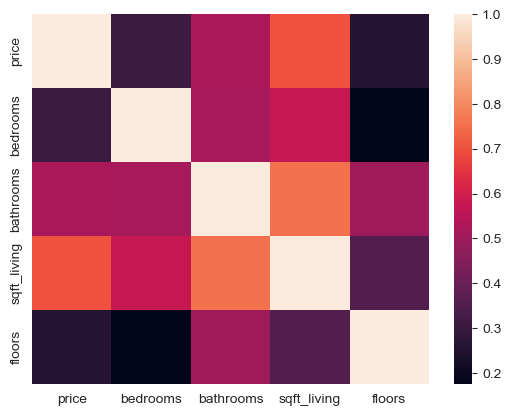

In [4]:
# Define as features que vão ser utilizadas
n_df = df.iloc[:, [2, 3, 4, 5, 7]]

# Heatmap das correlações das features selecionadas
sns.heatmap(n_df.corr())

# Data Plotting

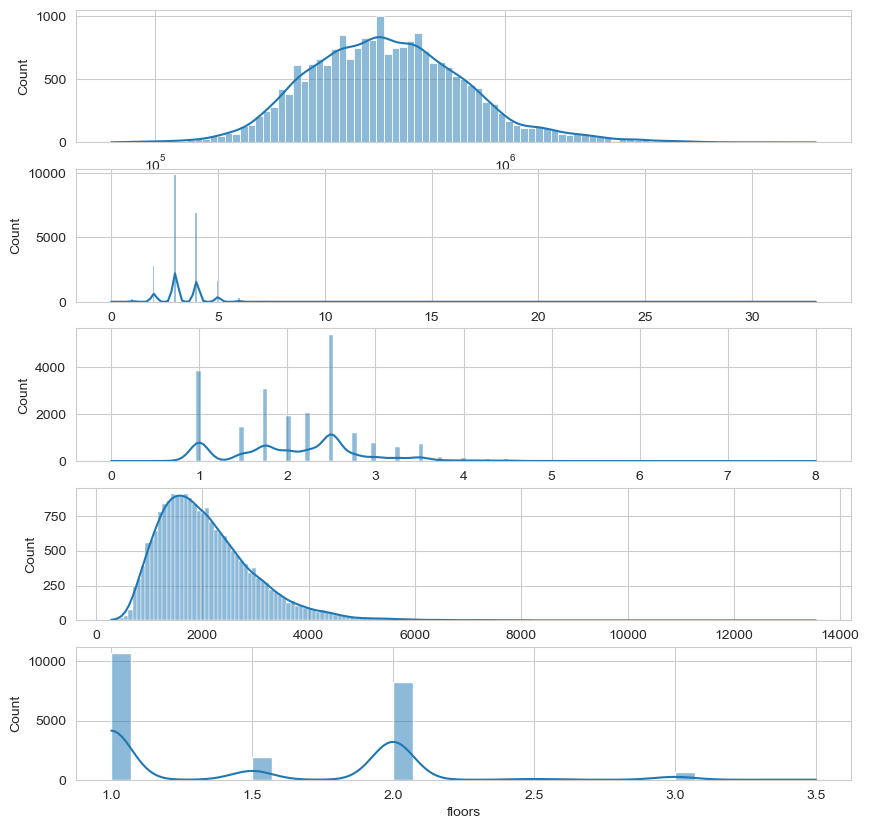

In [20]:
# Visualização das frequências dos valores das features
fig, axs = plt.subplots(5, 1, figsize=(10, 10))

sns.histplot(data=n_df, x=n_df["price"], log_scale=True, kde=True, ax=axs[0])
sns.histplot(data=n_df, x=n_df["bedrooms"], kde=True, ax=axs[1])
sns.histplot(data=n_df, x=n_df["bathrooms"], kde=True, ax=axs[2])
sns.histplot(data=n_df, x=n_df["sqft_living"], kde=True, ax=axs[3])
sns.histplot(data=n_df, x=n_df["floors"], kde=True, ax=axs[4])

plt.show()

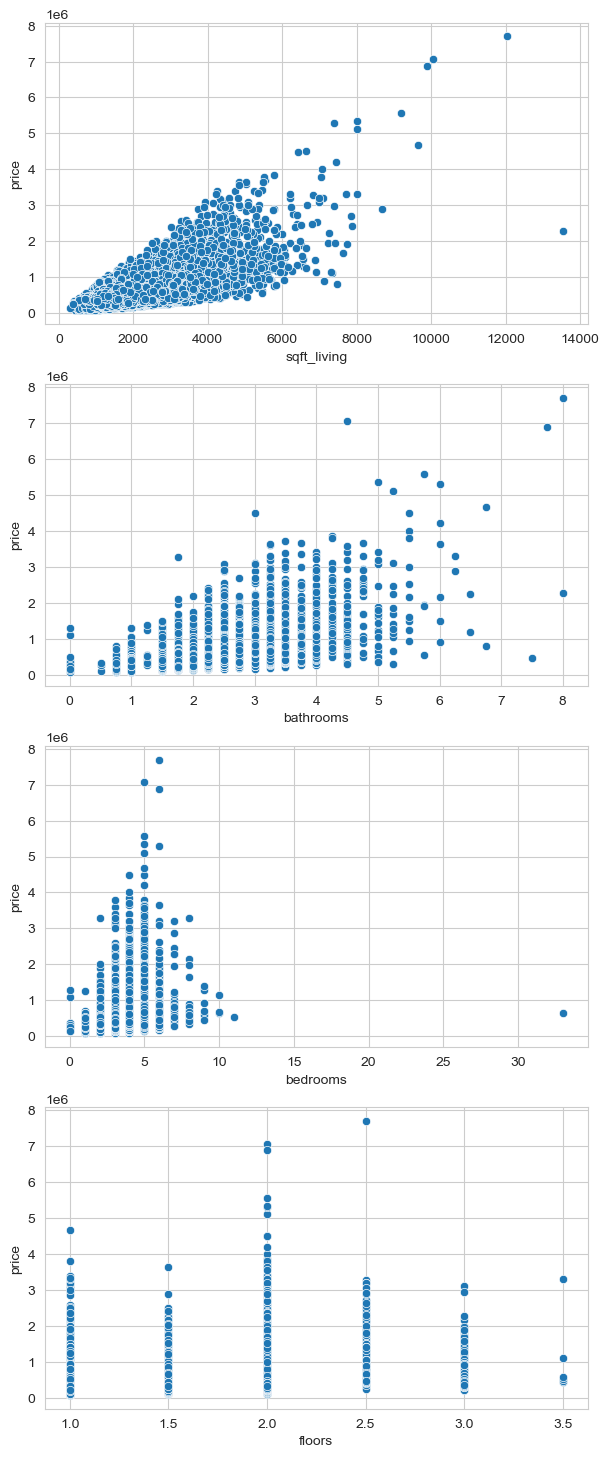

In [6]:
# Vizualização dos gráficos target, feature
fig, axes = plt.subplots(4, 1, figsize=(7, 18))

sns.scatterplot(data=n_df, x=n_df["bedrooms"], y=n_df["price"], ax=axes[2])
sns.scatterplot(data=n_df, x=n_df["bathrooms"], y=n_df["price"], ax=axes[1])
sns.scatterplot(data=n_df, x=n_df["sqft_living"], y=n_df["price"], ax=axes[0])
sns.scatterplot(data=n_df, x=n_df["floors"], y=n_df["price"], ax=axes[3])
plt.show()

# Teste de valor-p

In [7]:
# Fita o modelo de OLS para análise de variância (ANOVA)
modelo = ols("price ~ bedrooms + bathrooms + sqft_living + floors", n_df).fit()

print(modelo.summary())

# Performa a análise de variância no modelo
anova_resultados = anova_lm(modelo)

print(anova_resultados)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5554.
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:53:08   Log-Likelihood:            -2.9996e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21608   BIC:                         6.000e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.467e+04   7679.122      9.724      

Considerando o nível de significância $\alpha = 0.05$, é necessário que o valor-p seja < 0.05 para que haja significância estatística. O teste F identificou os seguintes valores-p:

<table>
<thead>
<tr>
<th>Feature</th>
<th>Valor-p</th>
</tr>
</thead>
<tbody>
<tr>
<td>bedrooms</td>
<td>0.000000</td>
</tr>
<tr>
<td>bathrooms</td>
<td>0.000000</td>
</tr>
<tr>
<td>sqft_living</td>
<td>0.000000</td>
</tr>
<tr>
<td>floors</td>
<td>0.957649</td>
</tr>
</tbody>
</table>

Com isso, a hipótese nula $H_0$ pode ser facilmente descartada, pois existem features com valor-p < 0.05; além disso, a feature <i>floors</i> não tem significância estatística, pois tem valor-p > 0.05, portanto deve ser removida do modelo.

In [8]:
# Remove feature sem significância estatística
N_df = n_df.drop(columns=["floors"])

In [9]:
# Splita X e Y
features = ["bedrooms", "bathrooms", "sqft_living"]
X = N_df[features]
Y = N_df["price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [10]:
# Treina o modelo
modelo_ = lr.Linear_Regression()
modelo_.fit_model(X_train, Y_train)

In [11]:
# Printa os coeficientes o modelo (linear, angulares e de determinação)
coeficientes = modelo_.find_coef()
for i, j in zip(range(len(coeficientes)), ["Esse é o coeficiente linear b_0:", "Esse é o coeficente angular b_1:", "Esse é o coeficente angular b_2:", "Esse é o coeficente angular b_3:"]):
    print(f"{j} {coeficientes[i]}")
    
r_squared = modelo_.r_squared()
print(f"O coeficiente de determinação (R^2) do modelo é: {r_squared}")

Esse é o coeficiente linear b_0: 81963.0472486513
Esse é o coeficente angular b_1: -59273.32230990232
Esse é o coeficente angular b_2: 14148.333569003607
Esse é o coeficente angular b_3: 301.21122805412693
O coeficiente de determinação (R^2) do modelo é: 0.45513654001065396


In [12]:
# Prediz novos dados para testar o modelo
Predicted_Data = modelo_.predict(X_test)

0.713248365578307

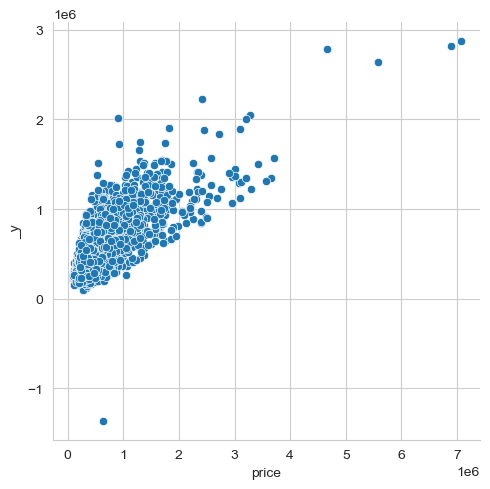

In [13]:
# Plota os dados preditos (obtidos com o modelo) e os dados observados no dataset
sns.relplot(x=Y_test, y=Predicted_Data)
# Printa a correlação entre os dados preditos (obtidos com o modelo) e os dados observados no dataset
np.corrcoef(Y_test, Predicted_Data) [0, 1]

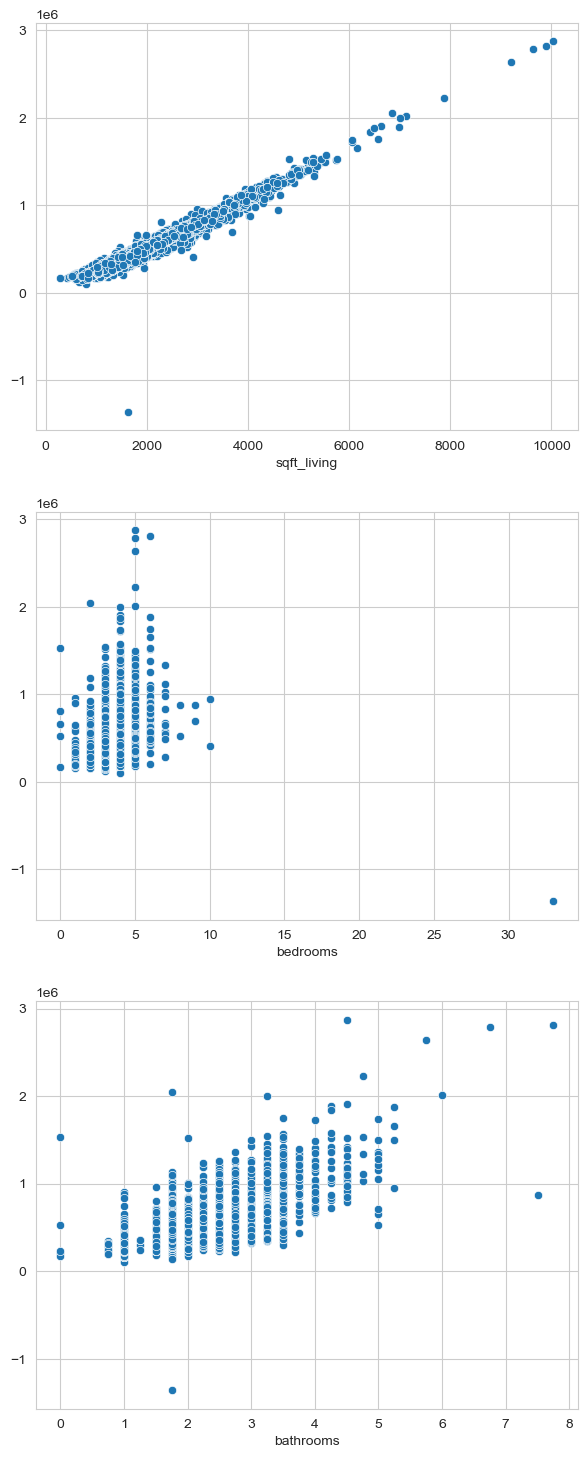

In [14]:
# Plota as features e a target predita pelo modelo
fig, axes = plt.subplots(3, 1, figsize=(7, 18))

sns.scatterplot(x=X_test["sqft_living"], y=Predicted_Data, ax=axes[0])
sns.scatterplot(x=X_test["bedrooms"], y=Predicted_Data, ax=axes[1])
sns.scatterplot(x=X_test["bathrooms"], y=Predicted_Data, ax=axes[2])
plt.show()

Temos algumas evidências que apontam que o modelo é melhor explicado por uma única feature, o <i>sqft_living<i/> — as duas outras features tem valor-p maior e menor correlação linear. Um teste rápido para investigar se o modelo é melhor sendo simples ou múltiplo é a comparação de $R^2$.

In [15]:
# Define a nova feature que vai ser usada e splita os dados
X_nova = N_df["sqft_living"]
Y_nova = N_df["price"]

X_tr, X_te, Y_tr, Y_te = train_test_split(X_nova, Y_nova)

In [16]:
# Fita o modelo
novo_modelo = lr.Linear_Regression()
novo_modelo.fit_model(X_tr, Y_tr)

In [17]:
# Printa os coeficientes (linear, angular e de determinação) do modelo
coeficientes = novo_modelo.find_coef()
for i, j in zip(range(len(coeficientes)), ["Esse é o coeficiente linear:", "Esse é o coeficente angular:"]):
    print(f"{j} {coeficientes[i]}")
    
print(f"O coeficiente de determinação (R^2) do modelo é: {novo_modelo.r_squared()}")

Esse é o coeficiente linear: -28551.643781596114
Esse é o coeficente angular: 272.1607770062026
O coeficiente de determinação (R^2) do modelo é: 0.4779260238486748


0.7201095088484906

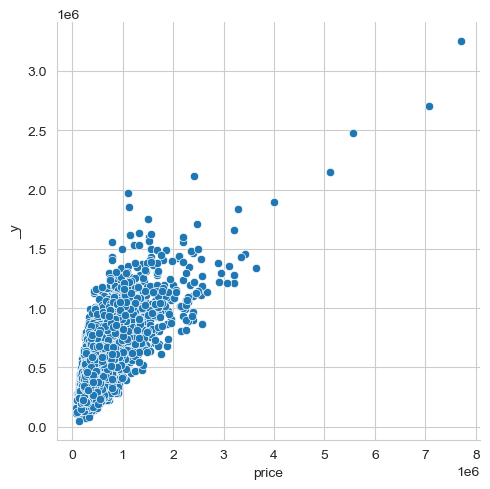

In [18]:
# Prediz novos dados, plota Y do dataset e Y predito pelo modelo e printa a correlação
n_Predicted_Data = novo_modelo.predict(X_te)
sns.relplot(x=Y_te, y=n_Predicted_Data)
np.corrcoef(Y_te, n_Predicted_Data) [0, 1]

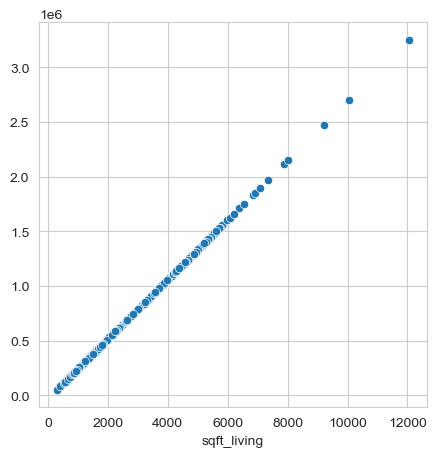

In [19]:
# Plota a feature e a target predita pelo novo modelo
fig, axes = plt.subplots(1, 1, figsize=(5, 5))

sns.scatterplot(x=X_te, y=n_Predicted_Data)
plt.show()

A diferença de $R^2$ não é significativa apontando que não há ganhos maiores em utilizar um modelo linear simples, preferindo-se então, uma regressão linear múltipla com 3 features.